In [1]:
import numpy as np
import numpy.matlib as mt

from ephysvibe.structures.neuron_data import NeuronData
from ephysvibe.trials import align_trials
from ephysvibe.task import task_constants

import os 
from matplotlib import cm
from matplotlib import pyplot as plt
import glob
import pickle

seed = 2023

In [2]:
with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/decoding_perf/decoding_perf_lipC0.8', 'rb') as handle:
    perf_lip = pickle.load(handle)

with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/decoding_perf/decoding_perf_pfcC0.8', 'rb') as handle:
    perf_pfc = pickle.load(handle)
    
with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/decoding_perf/decoding_perf_v4C0.8', 'rb') as handle:
    perf_v4 = pickle.load(handle)

In [3]:
def define_contour_latencies(data, thresh):
        
    X,Y = np.where(data>=thresh)
    A=np.zeros(data.shape)
    A[X,Y]=1
    Ya,Xa    =   np.where(np.abs(np.diff(A, axis=0))!=0)
    Yb,Xb    =   np.where(np.abs(np.diff(A, axis=1))!=0)
    Yy  =   np.concatenate([Ya, Yb])
    Xx  =   np.concatenate([Xa, Xb])
    return Xx,Yy

In [4]:
perf_lips_sample  =   perf_lip['perf sample']['sample']
perf_lips_orient  =   perf_lip['perf sample']['orientation']
perf_lips_color   =   perf_lip['perf sample']['color']
perf_lips_neutral =   perf_lip['perf sample']['neutral']

perf_pfcs_sample  =   perf_pfc['perf sample']['sample']
perf_pfcs_orient  =   perf_pfc['perf sample']['orientation']
perf_pfcs_color   =   perf_pfc['perf sample']['color']
perf_pfcs_neutral =   perf_pfc['perf sample']['neutral']

perf_v4s_sample  =   perf_v4['perf sample']['sample']
perf_v4s_orient  =   perf_v4['perf sample']['orientation']
perf_v4s_color   =   perf_v4['perf sample']['color']
perf_v4s_neutral =   perf_v4['perf sample']['neutral']


In [5]:
sig_lips_sample  =   np.empty([perf_lips_sample.shape[1], perf_lips_sample.shape[2]])
sig_lips_color   =   np.empty([perf_lips_color.shape[1],perf_lips_color.shape[2]])
sig_lips_orient  =   np.empty([perf_lips_orient.shape[1],perf_lips_orient.shape[2]])
sig_lips_neutral =   np.empty([perf_lips_neutral.shape[1],perf_lips_neutral.shape[1]])

sig_v4s_sample  =   np.empty([perf_v4s_sample.shape[1], perf_v4s_sample.shape[2]])
sig_v4s_color   =   np.empty([perf_v4s_color.shape[1],perf_v4s_color.shape[2]])
sig_v4s_orient  =   np.empty([perf_v4s_orient.shape[1],perf_v4s_orient.shape[2]])
sig_v4s_neutral =   np.empty([perf_v4s_neutral.shape[1],perf_v4s_neutral.shape[1]])

sig_pfcs_sample  =   np.empty([perf_pfcs_sample.shape[1], perf_pfcs_sample.shape[2]])
sig_pfcs_color   =   np.empty([perf_pfcs_color.shape[1],perf_pfcs_color.shape[2]])
sig_pfcs_orient  =   np.empty([perf_pfcs_orient.shape[1],perf_pfcs_orient.shape[2]])
sig_pfcs_neutral =   np.empty([perf_pfcs_neutral.shape[1],perf_pfcs_neutral.shape[1]])


for t in range(perf_lips_sample.shape[1]):
    for l in range(perf_lips_sample.shape[2]):
        sig_lips_sample[t,l]   =   np.where(perf_lips_sample[:,t,l]>10)[0].shape[0]
        sig_lips_color[t,l]    =   np.where(perf_lips_color[:,t,l]>10)[0].shape[0]
        sig_lips_orient[t,l]   =   np.where(perf_lips_orient[:,t,l]>10)[0].shape[0]
        sig_lips_neutral[t,l]  =   np.where(perf_lips_neutral[:,t,l]>10)[0].shape[0]
        
        sig_v4s_sample[t,l]   =   np.where(perf_v4s_sample[:,t,l]>10)[0].shape[0]
        sig_v4s_color[t,l]    =   np.where(perf_v4s_color[:,t,l]>10)[0].shape[0]
        sig_v4s_orient[t,l]   =   np.where(perf_v4s_orient[:,t,l]>10)[0].shape[0]
        sig_v4s_neutral[t,l]  =   np.where(perf_v4s_neutral[:,t,l]>10)[0].shape[0]
        
        sig_pfcs_sample[t,l]   =   np.where(perf_pfcs_sample[:,t,l]>10)[0].shape[0]
        sig_pfcs_color[t,l]    =   np.where(perf_pfcs_color[:,t,l]>10)[0].shape[0]
        sig_pfcs_orient[t,l]   =   np.where(perf_pfcs_orient[:,t,l]>10)[0].shape[0]
        sig_pfcs_neutral[t,l]  =   np.where(perf_pfcs_neutral[:,t,l]>10)[0].shape[0]




In [6]:
time_s=np.arange(start=-150, stop=450*3-50, step=10)
time_t=np.arange(start=-400, stop=450*2-50, step=10)
xt_s=[np.where(time_s==0)[0][0], np.where(time_s==450)[0][0], np.where(time_s==900)[0][0]]
xt_t=[np.where(time_t==0)[0][0], np.where(time_t==450)[0][0]]

In [7]:
thresh  =   950
cont_x_lip_sample,  cont_y_lip_sample  =   define_contour_latencies(sig_lips_sample, thresh)
cont_x_pfc_sample,  cont_y_pfc_sample  =   define_contour_latencies(sig_pfcs_sample, thresh)
cont_x_v4_sample,  cont_y_v4_sample    =   define_contour_latencies(sig_v4s_sample, thresh)

cont_x_lip_neutral,  cont_y_lip_neutral  =   define_contour_latencies(sig_lips_neutral, thresh)
cont_x_pfc_neutral,  cont_y_pfc_neutral  =   define_contour_latencies(sig_pfcs_neutral, thresh)
cont_x_v4_neutral,  cont_y_v4_neutral    =   define_contour_latencies(sig_v4s_neutral, thresh)

cont_x_lip_orient,  cont_y_lip_orient  =   define_contour_latencies(sig_lips_orient, thresh)
cont_x_pfc_orient,  cont_y_pfc_orient  =   define_contour_latencies(sig_pfcs_orient, thresh)
cont_x_v4_orient,  cont_y_v4_orient    =   define_contour_latencies(sig_v4s_orient, thresh)

cont_x_lip_color,  cont_y_lip_color =   define_contour_latencies(sig_lips_color, thresh)
cont_x_pfc_color,  cont_y_pfc_color =   define_contour_latencies(sig_pfcs_color, thresh)
cont_x_v4_color,  cont_y_v4_color   =   define_contour_latencies(sig_v4s_color, thresh)

# cont_x_pfc_sample,  cont_y_pfc_sample  =   define_contour_latencies(sig_pfcs_sample, thresh)
# cont_x_v4_sample,  cont_y_v4_sample    =   define_contour_latencies(sig_v4s_sample, thresh)

# cont_x_lip_neutral,  cont_y_lip_neutral  =   define_contour_latencies(sig_lips_neutral, thresh)
# cont_x_pfc_neutral,  cont_y_pfc_neutral  =   define_contour_latencies(sig_pfcs_neutral, thresh)
# cont_x_v4_neutral,  cont_y_v4_neutral    =   define_contour_latencies(sig_v4s_neutral, thresh)

# cont_x_lip_orient,  cont_y_lip_orient  =   define_contour_latencies(sig_lips_orient, thresh)
# cont_x_pfc_orient,  cont_y_pfc_orient  =   define_contour_latencies(sig_pfcs_orient, thresh)
# cont_x_v4_orient,  cont_y_v4_orient    =   define_contour_latencies(sig_v4s_orient, thresh)

# cont_x_lip_color,  cont_y_lip_color  =   define_contour_latencies(sig_lips_color, thresh)
# cont_x_pfc_color,  cont_y_pfc_color  =   define_contour_latencies(sig_pfcs_color, thresh)
# cont_x_v4_color,  cont_y_v4_color    =   define_contour_latencies(sig_v4s_color, thresh)

In [31]:
sig_lips_sample

array([[398., 399., 411., ..., 453., 455., 487.],
       [421., 399., 404., ..., 438., 447., 453.],
       [427., 420., 431., ..., 422., 468., 458.],
       ...,
       [432., 430., 411., ..., 855., 854., 865.],
       [447., 453., 436., ..., 860., 842., 863.],
       [467., 470., 450., ..., 855., 869., 881.]])

In [8]:

cont_x_lip_00_sample,  cont_y_00_lip_sample  =   define_contour_latencies(sig_lips_sample[len(time_s):,:len(time_s)], thresh)
cont_x_lip_10_sample,  cont_y_10_lip_sample  =   define_contour_latencies(sig_lips_sample[:len(time_s),:len(time_s)], thresh)
cont_x_lip_01_sample,  cont_y_01_lip_sample  =   define_contour_latencies(sig_lips_sample[len(time_s):,len(time_s):], thresh)
cont_x_lip_11_sample,  cont_y_11_lip_sample  =   define_contour_latencies(sig_lips_sample[:len(time_s),len(time_s):], thresh)



cont_x_pfc_00_sample,  cont_y_00_pfc_sample  =   define_contour_latencies(sig_pfcs_sample[len(time_s):,:len(time_s)], thresh)
cont_x_pfc_10_sample,  cont_y_10_pfc_sample  =   define_contour_latencies(sig_pfcs_sample[:len(time_s),:len(time_s)], thresh)
cont_x_pfc_01_sample,  cont_y_01_pfc_sample  =   define_contour_latencies(sig_pfcs_sample[len(time_s):,len(time_s):], thresh)
cont_x_pfc_11_sample,  cont_y_11_pfc_sample  =   define_contour_latencies(sig_pfcs_sample[:len(time_s),len(time_s):], thresh)


cont_x_v4_00_sample,  cont_y_00_v4_sample  =   define_contour_latencies(sig_v4s_sample[len(time_s):,:len(time_s)], thresh)
cont_x_v4_10_sample,  cont_y_10_v4_sample  =   define_contour_latencies(sig_v4s_sample[:len(time_s),:len(time_s)], thresh)
cont_x_v4_01_sample,  cont_y_01_v4_sample  =   define_contour_latencies(sig_v4s_sample[len(time_s):,len(time_s):], thresh)
cont_x_v4_11_sample,  cont_y_11_v4_sample  =   define_contour_latencies(sig_v4s_sample[:len(time_s),len(time_s):], thresh)




cont_x_lip_00_neutral,  cont_y_00_lip_neutral  =   define_contour_latencies(sig_lips_neutral[len(time_s):,:len(time_s)], thresh)
cont_x_lip_10_neutral,  cont_y_10_lip_neutral  =   define_contour_latencies(sig_lips_neutral[:len(time_s),:len(time_s)], thresh)
cont_x_lip_01_neutral,  cont_y_01_lip_neutral  =   define_contour_latencies(sig_lips_neutral[len(time_s):,len(time_s):], thresh)
cont_x_lip_11_neutral,  cont_y_11_lip_neutral  =   define_contour_latencies(sig_lips_neutral[:len(time_s),len(time_s):], thresh)



cont_x_pfc_00_neutral,  cont_y_00_pfc_neutral  =   define_contour_latencies(sig_pfcs_neutral[len(time_s):,:len(time_s)], thresh)
cont_x_pfc_10_neutral,  cont_y_10_pfc_neutral  =   define_contour_latencies(sig_pfcs_neutral[:len(time_s),:len(time_s)], thresh)
cont_x_pfc_01_neutral,  cont_y_01_pfc_neutral  =   define_contour_latencies(sig_pfcs_neutral[len(time_s):,len(time_s):], thresh)
cont_x_pfc_11_neutral,  cont_y_11_pfc_neutral  =   define_contour_latencies(sig_pfcs_neutral[:len(time_s),len(time_s):], thresh)


cont_x_v4_00_neutral,  cont_y_00_v4_neutral  =   define_contour_latencies(sig_v4s_neutral[len(time_s):,:len(time_s)], thresh)
cont_x_v4_10_neutral,  cont_y_10_v4_neutral  =   define_contour_latencies(sig_v4s_neutral[:len(time_s),:len(time_s)], thresh)
cont_x_v4_01_neutral,  cont_y_01_v4_neutral  =   define_contour_latencies(sig_v4s_neutral[len(time_s):,len(time_s):], thresh)
cont_x_v4_11_neutral,  cont_y_11_v4_neutral  =   define_contour_latencies(sig_v4s_neutral[:len(time_s),len(time_s):], thresh)


cont_x_lip_00_orient,  cont_y_00_lip_orient  =   define_contour_latencies(sig_lips_orient[len(time_s):,:len(time_s)], thresh)
cont_x_lip_10_orient,  cont_y_10_lip_orient  =   define_contour_latencies(sig_lips_orient[:len(time_s),:len(time_s)], thresh)
cont_x_lip_01_orient,  cont_y_01_lip_orient  =   define_contour_latencies(sig_lips_orient[len(time_s):,len(time_s):], thresh)
cont_x_lip_11_orient,  cont_y_11_lip_orient  =   define_contour_latencies(sig_lips_orient[:len(time_s),len(time_s):], thresh)



cont_x_pfc_00_orient,  cont_y_00_pfc_orient  =   define_contour_latencies(sig_pfcs_orient[len(time_s):,:len(time_s)], thresh)
cont_x_pfc_10_orient,  cont_y_10_pfc_orient  =   define_contour_latencies(sig_pfcs_orient[:len(time_s),:len(time_s)], thresh)
cont_x_pfc_01_orient,  cont_y_01_pfc_orient  =   define_contour_latencies(sig_pfcs_orient[len(time_s):,len(time_s):], thresh)
cont_x_pfc_11_orient,  cont_y_11_pfc_orient  =   define_contour_latencies(sig_pfcs_orient[:len(time_s),len(time_s):], thresh)


cont_x_v4_00_orient,  cont_y_00_v4_orient  =   define_contour_latencies(sig_v4s_orient[len(time_s):,:len(time_s)], thresh)
cont_x_v4_10_orient,  cont_y_10_v4_orient  =   define_contour_latencies(sig_v4s_orient[:len(time_s),:len(time_s)], thresh)
cont_x_v4_01_orient,  cont_y_01_v4_orient  =   define_contour_latencies(sig_v4s_orient[len(time_s):,len(time_s):], thresh)
cont_x_v4_11_orient,  cont_y_11_v4_orient  =   define_contour_latencies(sig_v4s_orient[:len(time_s),len(time_s):], thresh)

cont_x_lip_00_color,  cont_y_00_lip_color  =   define_contour_latencies(sig_lips_color[len(time_s):,:len(time_s)], thresh)
cont_x_lip_10_color,  cont_y_10_lip_color  =   define_contour_latencies(sig_lips_color[:len(time_s),:len(time_s)], thresh)
cont_x_lip_01_color,  cont_y_01_lip_color  =   define_contour_latencies(sig_lips_color[len(time_s):,len(time_s):], thresh)
cont_x_lip_11_color,  cont_y_11_lip_color  =   define_contour_latencies(sig_lips_color[:len(time_s),len(time_s):], thresh)



cont_x_pfc_00_color,  cont_y_00_pfc_color  =   define_contour_latencies(sig_pfcs_color[len(time_s):,:len(time_s)], thresh)
cont_x_pfc_10_color,  cont_y_10_pfc_color  =   define_contour_latencies(sig_pfcs_color[:len(time_s),:len(time_s)], thresh)
cont_x_pfc_01_color,  cont_y_01_pfc_color  =   define_contour_latencies(sig_pfcs_color[len(time_s):,len(time_s):], thresh)
cont_x_pfc_11_color,  cont_y_11_pfc_color  =   define_contour_latencies(sig_pfcs_color[:len(time_s),len(time_s):], thresh)


cont_x_v4_00_color,  cont_y_00_v4_color  =   define_contour_latencies(sig_v4s_color[len(time_s):,:len(time_s)], thresh)
cont_x_v4_10_color,  cont_y_10_v4_color  =   define_contour_latencies(sig_v4s_color[:len(time_s),:len(time_s)], thresh)
cont_x_v4_01_color,  cont_y_01_v4_color  =   define_contour_latencies(sig_v4s_color[len(time_s):,len(time_s):], thresh)
cont_x_v4_11_color,  cont_y_11_v4_color  =   define_contour_latencies(sig_v4s_color[:len(time_s),len(time_s):], thresh)

In [14]:
data=sig_pfcs_neutral[:len(time_s),:len(time_s)]
thresh=950
X,Y = np.where(data>=thresh)
A=np.zeros(data.shape)
A[X,Y]=1
Xx,Yy    =   np.where(np.abs(np.diff(A))!=0)

In [9]:
## split data based on training and testing epoch
# Neutral
perf_lip_tr_s_t_s_neutral   =   perf_lips_neutral[:,:len(time_s),:len(time_s)]
perf_lip_tr_s_t_t_neutral   =   perf_lips_neutral[:,:len(time_s),len(time_s):]
perf_lip_tr_t_t_s_neutral   =   perf_lips_neutral[:,len(time_s):,:len(time_s)]
perf_lip_tr_t_t_t_neutral   =   perf_lips_neutral[:,len(time_s):,len(time_s):]

perf_pfc_tr_s_t_s_neutral   =   perf_pfcs_neutral[:,:len(time_s),:len(time_s)]
perf_pfc_tr_s_t_t_neutral   =   perf_pfcs_neutral[:,:len(time_s),len(time_s):]
perf_pfc_tr_t_t_s_neutral   =   perf_pfcs_neutral[:,len(time_s):,:len(time_s)]
perf_pfc_tr_t_t_t_neutral   =   perf_pfcs_neutral[:,len(time_s):,len(time_s):]

perf_v4_tr_s_t_s_neutral    =   perf_v4s_neutral[:,:len(time_s),:len(time_s)]
perf_v4_tr_s_t_t_neutral    =   perf_v4s_neutral[:,:len(time_s),len(time_s):]
perf_v4_tr_t_t_s_neutral    =   perf_v4s_neutral[:,len(time_s):,:len(time_s)]
perf_v4_tr_t_t_t_neutral    =   perf_v4s_neutral[:,len(time_s):,len(time_s):]


# Sample
perf_lip_tr_s_t_s_sample    =   perf_lips_sample[:,:len(time_s),:len(time_s)]
perf_lip_tr_s_t_t_sample    =   perf_lips_sample[:,:len(time_s),len(time_s):]
perf_lip_tr_t_t_s_sample    =   perf_lips_sample[:,len(time_s):,:len(time_s)]
perf_lip_tr_t_t_t_sample    =   perf_lips_sample[:,len(time_s):,len(time_s):]

perf_pfc_tr_s_t_s_sample    =   perf_pfcs_sample[:,:len(time_s),:len(time_s)]
perf_pfc_tr_s_t_t_sample    =   perf_pfcs_sample[:,:len(time_s),len(time_s):]
perf_pfc_tr_t_t_s_sample    =   perf_pfcs_sample[:,len(time_s):,:len(time_s)]
perf_pfc_tr_t_t_t_sample    =   perf_pfcs_sample[:,len(time_s):,len(time_s):]

perf_v4_tr_s_t_s_sample     =   perf_v4s_sample[:,:len(time_s),:len(time_s)]
perf_v4_tr_s_t_t_sample     =   perf_v4s_sample[:,:len(time_s),len(time_s):]
perf_v4_tr_t_t_s_sample     =   perf_v4s_sample[:,len(time_s):,:len(time_s)]
perf_v4_tr_t_t_t_sample     =   perf_v4s_sample[:,len(time_s):,len(time_s):]

perf_lip_tr_s_t_s_sample    =   perf_lips_sample[:,:len(time_s),:len(time_s)]
perf_lip_tr_s_t_t_sample    =   perf_lips_sample[:,:len(time_s),len(time_s):]
perf_lip_tr_t_t_s_sample    =   perf_lips_sample[:,len(time_s):,:len(time_s)]
perf_lip_tr_t_t_t_sample    =   perf_lips_sample[:,len(time_s):,len(time_s):]

perf_pfc_tr_s_t_s_sample    =   perf_pfcs_sample[:,:len(time_s),:len(time_s)]
perf_pfc_tr_s_t_t_sample    =   perf_pfcs_sample[:,:len(time_s),len(time_s):]
perf_pfc_tr_t_t_s_sample    =   perf_pfcs_sample[:,len(time_s):,:len(time_s)]
perf_pfc_tr_t_t_t_sample    =   perf_pfcs_sample[:,len(time_s):,len(time_s):]

perf_v4_tr_s_t_s_sample     =   perf_v4s_sample[:,:len(time_s),:len(time_s)]
perf_v4_tr_s_t_t_sample     =   perf_v4s_sample[:,:len(time_s),len(time_s):]
perf_v4_tr_t_t_s_sample     =   perf_v4s_sample[:,len(time_s):,:len(time_s)]
perf_v4_tr_t_t_t_sample     =   perf_v4s_sample[:,len(time_s):,len(time_s):]

# Orientation
perf_lip_tr_s_t_s_orient    =   perf_lips_orient[:,:len(time_s),:len(time_s)]
perf_lip_tr_s_t_t_orient    =   perf_lips_orient[:,:len(time_s),len(time_s):]
perf_lip_tr_t_t_s_orient    =   perf_lips_orient[:,len(time_s):,:len(time_s)]
perf_lip_tr_t_t_t_orient    =   perf_lips_orient[:,len(time_s):,len(time_s):]

perf_pfc_tr_s_t_s_orient    =   perf_pfcs_orient[:,:len(time_s),:len(time_s)]
perf_pfc_tr_s_t_t_orient    =   perf_pfcs_orient[:,:len(time_s),len(time_s):]
perf_pfc_tr_t_t_s_orient    =   perf_pfcs_orient[:,len(time_s):,:len(time_s)]
perf_pfc_tr_t_t_t_orient    =   perf_pfcs_orient[:,len(time_s):,len(time_s):]

perf_v4_tr_s_t_s_orient     =   perf_v4s_orient[:,:len(time_s),:len(time_s)]
perf_v4_tr_s_t_t_orient     =   perf_v4s_orient[:,:len(time_s),len(time_s):]
perf_v4_tr_t_t_s_orient     =   perf_v4s_orient[:,len(time_s):,:len(time_s)]
perf_v4_tr_t_t_t_orient     =   perf_v4s_orient[:,len(time_s):,len(time_s):]

# Color
perf_lip_tr_s_t_s_color     =   perf_lips_color[:,:len(time_s),:len(time_s)]
perf_lip_tr_s_t_t_color     =   perf_lips_color[:,:len(time_s),len(time_s):]
perf_lip_tr_t_t_s_color     =   perf_lips_color[:,len(time_s):,:len(time_s)]
perf_lip_tr_t_t_t_color     =   perf_lips_color[:,len(time_s):,len(time_s):]

perf_pfc_tr_s_t_s_color     =   perf_pfcs_color[:,:len(time_s),:len(time_s)]
perf_pfc_tr_s_t_t_color     =   perf_pfcs_color[:,:len(time_s),len(time_s):]
perf_pfc_tr_t_t_s_color     =   perf_pfcs_color[:,len(time_s):,:len(time_s)]
perf_pfc_tr_t_t_t_color     =   perf_pfcs_color[:,len(time_s):,len(time_s):]

perf_v4_tr_s_t_s_color      =   perf_v4s_color[:,:len(time_s),:len(time_s)]
perf_v4_tr_s_t_t_color      =   perf_v4s_color[:,:len(time_s),len(time_s):]
perf_v4_tr_t_t_s_color      =   perf_v4s_color[:,len(time_s):,:len(time_s)]
perf_v4_tr_t_t_t_color      =   perf_v4s_color[:,len(time_s):,len(time_s):]

X_grid_tr_s_t_s, Y_grid_tr_s_t_s    =   np.meshgrid(np.arange(len(time_s)), np.arange(len(time_s)))
X_grid_tr_t_t_s, Y_grid_tr_t_t_s    =   np.meshgrid(np.arange(len(time_s)), np.arange(len(time_t)))
X_grid_tr_s_t_t, Y_grid_tr_s_t_t    =   np.meshgrid(np.arange(len(time_t)), np.arange(len(time_s)))
X_grid_tr_t_t_t, Y_grid_tr_t_t_t    =   np.meshgrid(np.arange(len(time_t)), np.arange(len(time_t)))



In [10]:
## split data based on training and testing epoch
# Neutral
sig_lip_tr_s_t_s_neutral    =   sig_lips_neutral[:len(time_s),:len(time_s)]
sig_lip_tr_s_t_t_neutral    =   sig_lips_neutral[:len(time_s),len(time_s):]
sig_lip_tr_t_t_s_neutral    =   sig_lips_neutral[len(time_s):,:len(time_s)]
sig_lip_tr_t_t_t_neutral    =   sig_lips_neutral[len(time_s):,len(time_s):]

sig_pfc_tr_s_t_s_neutral    =   sig_pfcs_neutral[:len(time_s),:len(time_s)]
sig_pfc_tr_s_t_t_neutral    =   sig_pfcs_neutral[:len(time_s),len(time_s):]
sig_pfc_tr_t_t_s_neutral    =   sig_pfcs_neutral[len(time_s):,:len(time_s)]
sig_pfc_tr_t_t_t_neutral    =   sig_pfcs_neutral[len(time_s):,len(time_s):]

sig_v4_tr_s_t_s_neutral     =   sig_v4s_neutral[:len(time_s),:len(time_s)]
sig_v4_tr_s_t_t_neutral     =   sig_v4s_neutral[:len(time_s),len(time_s):]
sig_v4_tr_t_t_s_neutral     =   sig_v4s_neutral[len(time_s):,:len(time_s)]
sig_v4_tr_t_t_t_neutral     =   sig_v4s_neutral[len(time_s):,len(time_s):]


# Sample
sig_lip_tr_s_t_s_sample     =   sig_lips_sample[:len(time_s),:len(time_s)]
sig_lip_tr_s_t_t_sample     =   sig_lips_sample[:len(time_s),len(time_s):]
sig_lip_tr_t_t_s_sample     =   sig_lips_sample[len(time_s):,:len(time_s)]
sig_lip_tr_t_t_t_sample     =   sig_lips_sample[len(time_s):,len(time_s):]

sig_pfc_tr_s_t_s_sample     =   sig_pfcs_sample[:len(time_s),:len(time_s)]
sig_pfc_tr_s_t_t_sample     =   sig_pfcs_sample[:len(time_s),len(time_s):]
sig_pfc_tr_t_t_s_sample     =   sig_pfcs_sample[len(time_s):,:len(time_s)]
sig_pfc_tr_t_t_t_sample     =   sig_pfcs_sample[len(time_s):,len(time_s):]

sig_v4_tr_s_t_s_sample      =   sig_v4s_sample[:len(time_s),:len(time_s)]
sig_v4_tr_s_t_t_sample      =   sig_v4s_sample[:len(time_s),len(time_s):]
sig_v4_tr_t_t_s_sample      =   sig_v4s_sample[len(time_s):,:len(time_s)]
sig_v4_tr_t_t_t_sample      =   sig_v4s_sample[len(time_s):,len(time_s):]

sig_lip_tr_s_t_s_sample     =   sig_lips_sample[:len(time_s),:len(time_s)]
sig_lip_tr_s_t_t_sample     =   sig_lips_sample[:len(time_s),len(time_s):]
sig_lip_tr_t_t_s_sample     =   sig_lips_sample[len(time_s):,:len(time_s)]
sig_lip_tr_t_t_t_sample     =   sig_lips_sample[len(time_s):,len(time_s):]

sig_pfc_tr_s_t_s_sample     =   sig_pfcs_sample[:len(time_s),:len(time_s)]
sig_pfc_tr_s_t_t_sample     =   sig_pfcs_sample[:len(time_s),len(time_s):]
sig_pfc_tr_t_t_s_sample     =   sig_pfcs_sample[len(time_s):,:len(time_s)]
sig_pfc_tr_t_t_t_sample     =   sig_pfcs_sample[len(time_s):,len(time_s):]

sig_v4_tr_s_t_s_sample      =   sig_v4s_sample[:len(time_s),:len(time_s)]
sig_v4_tr_s_t_t_sample      =   sig_v4s_sample[:len(time_s),len(time_s):]
sig_v4_tr_t_t_s_sample      =   sig_v4s_sample[len(time_s):,:len(time_s)]
sig_v4_tr_t_t_t_sample      =   sig_v4s_sample[len(time_s):,len(time_s):]

# Orientation
sig_lip_tr_s_t_s_orient     =   sig_lips_orient[:len(time_s),:len(time_s)]
sig_lip_tr_s_t_t_orient     =   sig_lips_orient[:len(time_s),len(time_s):]
sig_lip_tr_t_t_s_orient     =   sig_lips_orient[len(time_s):,:len(time_s)]
sig_lip_tr_t_t_t_orient     =   sig_lips_orient[len(time_s):,len(time_s):]

sig_pfc_tr_s_t_s_orient     =   sig_pfcs_orient[:len(time_s),:len(time_s)]
sig_pfc_tr_s_t_t_orient     =   sig_pfcs_orient[:len(time_s),len(time_s):]
sig_pfc_tr_t_t_s_orient     =   sig_pfcs_orient[len(time_s):,:len(time_s)]
sig_pfc_tr_t_t_t_orient     =   sig_pfcs_orient[len(time_s):,len(time_s):]

sig_v4_tr_s_t_s_orient      =   sig_v4s_orient[:len(time_s),:len(time_s)]
sig_v4_tr_s_t_t_orient      =   sig_v4s_orient[:len(time_s),len(time_s):]
sig_v4_tr_t_t_s_orient      =   sig_v4s_orient[len(time_s):,:len(time_s)]
sig_v4_tr_t_t_t_orient      =   sig_v4s_orient[len(time_s):,len(time_s):]

# Color
sig_lip_tr_s_t_s_color      =   sig_lips_color[:len(time_s),:len(time_s)]
sig_lip_tr_s_t_t_color      =   sig_lips_color[:len(time_s),len(time_s):]
sig_lip_tr_t_t_s_color      =   sig_lips_color[len(time_s):,:len(time_s)]
sig_lip_tr_t_t_t_color      =   sig_lips_color[len(time_s):,len(time_s):]

sig_pfc_tr_s_t_s_color      =   sig_pfcs_color[:len(time_s),:len(time_s)]
sig_pfc_tr_s_t_t_color      =   sig_pfcs_color[:len(time_s),len(time_s):]
sig_pfc_tr_t_t_s_color      =   sig_pfcs_color[len(time_s):,:len(time_s)]
sig_pfc_tr_t_t_t_color      =   sig_pfcs_color[len(time_s):,len(time_s):]

sig_v4_tr_s_t_s_color       =   sig_v4s_color[:len(time_s),:len(time_s)]
sig_v4_tr_s_t_t_color       =   sig_v4s_color[:len(time_s),len(time_s):]
sig_v4_tr_t_t_s_color       =   sig_v4s_color[len(time_s):,:len(time_s)]
sig_v4_tr_t_t_t_color       =   sig_v4s_color[len(time_s):,len(time_s):]

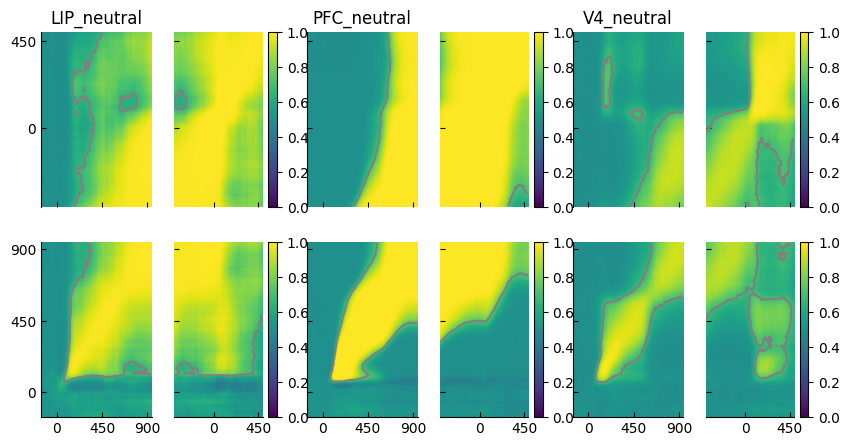

In [11]:
thresh=950
fig, ax =   plt.subplots(2,6,figsize=(10,5), sharex="col", sharey="row")
time_s=np.arange(start=-150, stop=450*3-50, step=10)
time_t=np.arange(start=-400, stop=450*2-50, step=10)

samp_limit  =   np.where(time_s==950)[0][0]
test_limit  =   np.where(time_t==500)[0][0]


im00=ax[0,0].imshow(np.mean(perf_lip_tr_t_t_s_neutral[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im10=ax[1,0].imshow(np.mean(perf_lip_tr_s_t_s_neutral[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im01=ax[0,1].imshow(np.mean(perf_lip_tr_t_t_t_neutral[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im11=ax[1,1].imshow(np.mean(perf_lip_tr_s_t_t_neutral[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')

im02=ax[0,2].imshow(np.mean(perf_pfc_tr_t_t_s_neutral[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im12=ax[1,2].imshow(np.mean(perf_pfc_tr_s_t_s_neutral[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im03=ax[0,3].imshow(np.mean(perf_pfc_tr_t_t_t_neutral[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im13=ax[1,3].imshow(np.mean(perf_pfc_tr_s_t_t_neutral[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')

ax[0, 0].set_title('LIP_neutral')
ax[0, 2].set_title('PFC_neutral')
ax[0, 4].set_title('V4_neutral')

im04=ax[0,4].imshow(np.mean(perf_v4_tr_t_t_s_neutral[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im14=ax[1,4].imshow(np.mean(perf_v4_tr_s_t_s_neutral[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im05=ax[0,5].imshow(np.mean(perf_v4_tr_t_t_t_neutral[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im15=ax[1,5].imshow(np.mean(perf_v4_tr_s_t_t_neutral[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')

ax[0,0].contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_lip_tr_t_t_s_neutral[:test_limit,:samp_limit], [thresh], colors='grey')
ax[0,1].contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_lip_tr_t_t_t_neutral[:test_limit,:test_limit], [thresh], colors='grey')
ax[1,0].contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_lip_tr_s_t_s_neutral[:samp_limit,:samp_limit], [thresh], colors='grey')
ax[1,1].contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_lip_tr_s_t_t_neutral[:samp_limit,:test_limit], [thresh], colors='grey')

ax[0,2].contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_pfc_tr_t_t_s_neutral[:test_limit,:samp_limit], [thresh], colors='grey')
ax[0,3].contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_pfc_tr_t_t_t_neutral[:test_limit,:test_limit], [thresh], colors='grey')
ax[1,2].contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_pfc_tr_s_t_s_neutral[:samp_limit,:samp_limit], [thresh], colors='grey')
ax[1,3].contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_pfc_tr_s_t_t_neutral[:samp_limit,:test_limit], [thresh], colors='grey')

ax[0,4].contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_v4_tr_t_t_s_neutral[:test_limit,:samp_limit], [thresh], colors='grey')
ax[0,5].contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_v4_tr_t_t_t_neutral[:test_limit,:test_limit], [thresh], colors='grey')
ax[1,4].contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_v4_tr_s_t_s_neutral[:samp_limit,:samp_limit], [thresh], colors='grey')
ax[1,5].contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_v4_tr_s_t_t_neutral[:samp_limit,:test_limit], [thresh], colors='grey')

ax[0,0].set_xticks(xt_s)
ax[0,0].set_yticks(xt_t)
ax[1,0].set_xticks(xt_s)
ax[1,0].set_yticks(xt_s)
ax[0,1].set_xticks(xt_t)
ax[0,1].set_yticks(xt_t)
ax[1,1].set_xticks(xt_t)
ax[1,1].set_yticks(xt_s)

ax[0,0].set_xticklabels(time_s[xt_s].astype(str))
ax[0,0].set_yticklabels(time_t[xt_t].astype(str))
ax[1,0].set_xticklabels(time_s[xt_s].astype(str))
ax[1,0].set_yticklabels(time_s[xt_s].astype(str))
ax[0,1].set_xticklabels(time_t[xt_t].astype(str))
ax[0,1].set_yticklabels(time_t[xt_t].astype(str))
ax[1,1].set_xticklabels(time_t[xt_t].astype(str))
ax[1,1].set_yticklabels(time_s[xt_s].astype(str))

ax[0,2].set_xticks(xt_s)
ax[0,2].set_yticks(xt_t)
ax[1,2].set_xticks(xt_s)
ax[1,2].set_yticks(xt_s)
ax[0,3].set_xticks(xt_t)
ax[0,3].set_yticks(xt_t)
ax[1,3].set_xticks(xt_t)
ax[1,3].set_yticks(xt_s)

ax[0,2].set_xticklabels(time_s[xt_s].astype(str))
ax[0,2].set_yticklabels(time_t[xt_t].astype(str))
ax[1,2].set_xticklabels(time_s[xt_s].astype(str))
ax[1,2].set_yticklabels(time_s[xt_s].astype(str))
ax[0,3].set_xticklabels(time_t[xt_t].astype(str))
ax[0,3].set_yticklabels(time_t[xt_t].astype(str))
ax[1,3].set_xticklabels(time_t[xt_t].astype(str))
ax[1,3].set_yticklabels(time_s[xt_s].astype(str))

ax[0,4].set_xticks(xt_s)
ax[0,4].set_yticks(xt_t)
ax[1,4].set_xticks(xt_s)
ax[1,4].set_yticks(xt_s)
ax[0,5].set_xticks(xt_t)
ax[0,5].set_yticks(xt_t)
ax[1,5].set_xticks(xt_t)
ax[1,5].set_yticks(xt_s)

ax[0,4].set_xticklabels(time_s[xt_s].astype(str))
ax[0,4].set_yticklabels(time_t[xt_t].astype(str))
ax[1,4].set_xticklabels(time_s[xt_s].astype(str))
ax[1,4].set_yticklabels(time_s[xt_s].astype(str))
ax[0,5].set_xticklabels(time_t[xt_t].astype(str))
ax[0,5].set_yticklabels(time_t[xt_t].astype(str))
ax[1,5].set_xticklabels(time_t[xt_t].astype(str))
ax[1,5].set_yticklabels(time_s[xt_s].astype(str))


ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['bottom'].set_visible(False)

ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['bottom'].set_visible(False)
ax[0,1].spines['left'].set_visible(False)

ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)

ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['left'].set_visible(False)

ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['bottom'].set_visible(False)

ax[0,3].spines['top'].set_visible(False)
ax[0,3].spines['right'].set_visible(False)
ax[0,3].spines['bottom'].set_visible(False)
ax[0,3].spines['left'].set_visible(False)

ax[1,2].spines['top'].set_visible(False)
ax[1,2].spines['right'].set_visible(False)

ax[1,3].spines['top'].set_visible(False)
ax[1,3].spines['right'].set_visible(False)
ax[1,3].spines['left'].set_visible(False)


ax[0,4].spines['top'].set_visible(False)
ax[0,4].spines['right'].set_visible(False)
ax[0,4].spines['bottom'].set_visible(False)

ax[0,5].spines['top'].set_visible(False)
ax[0,5].spines['right'].set_visible(False)
ax[0,5].spines['bottom'].set_visible(False)
ax[0,5].spines['left'].set_visible(False)

ax[1,4].spines['top'].set_visible(False)
ax[1,4].spines['right'].set_visible(False)

ax[1,5].spines['top'].set_visible(False)
ax[1,5].spines['right'].set_visible(False)
ax[1,5].spines['left'].set_visible(False)

ax[0,0].tick_params(direction="in")
ax[0,1].tick_params(direction="in")
ax[1,0].tick_params(direction="in")
ax[1,1].tick_params(direction="in")

ax[0,2].tick_params(direction="in")
ax[0,3].tick_params(direction="in")
ax[1,2].tick_params(direction="in")
ax[1,3].tick_params(direction="in")

ax[0,4].tick_params(direction="in")
ax[0,5].tick_params(direction="in")
ax[1,4].tick_params(direction="in")
ax[1,5].tick_params(direction="in")
fig.colorbar(im01)
fig.colorbar(im11)
fig.colorbar(im03)
fig.colorbar(im13)
fig.colorbar(im05)
fig.colorbar(im15)
for ax in fig.get_axes():
    ax.label_outer()

plt.savefig('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/figures/decoding_neutral.pdf') 

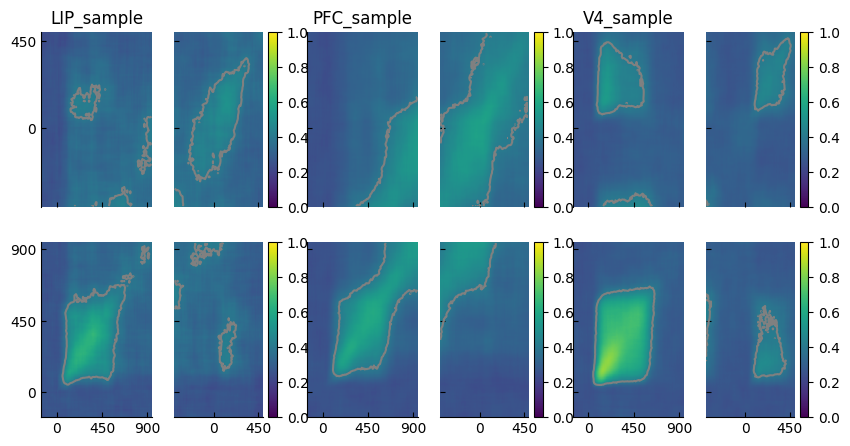

In [11]:
thresh=950
fig, ax =   plt.subplots(2,6,figsize=(10,5), sharex="col", sharey="row")
time_s=np.arange(start=-150, stop=450*3-50, step=10)
time_t=np.arange(start=-400, stop=450*2-50, step=10)

samp_limit  =   np.where(time_s==950)[0][0]
test_limit  =   np.where(time_t==500)[0][0]


im00=ax[0,0].imshow(np.mean(perf_lip_tr_t_t_s_sample[:,:test_limit,:samp_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im10=ax[1,0].imshow(np.mean(perf_lip_tr_s_t_s_sample[:,:samp_limit,:samp_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im01=ax[0,1].imshow(np.mean(perf_lip_tr_t_t_t_sample[:,:test_limit,:test_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im11=ax[1,1].imshow(np.mean(perf_lip_tr_s_t_t_sample[:,:samp_limit,:test_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')

im02=ax[0,2].imshow(np.mean(perf_pfc_tr_t_t_s_sample[:,:test_limit,:samp_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im12=ax[1,2].imshow(np.mean(perf_pfc_tr_s_t_s_sample[:,:samp_limit,:samp_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im03=ax[0,3].imshow(np.mean(perf_pfc_tr_t_t_t_sample[:,:test_limit,:test_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im13=ax[1,3].imshow(np.mean(perf_pfc_tr_s_t_t_sample[:,:samp_limit,:test_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')

ax[0, 0].set_title('LIP_sample')
ax[0, 2].set_title('PFC_sample')
ax[0, 4].set_title('V4_sample')

im04=ax[0,4].imshow(np.mean(perf_v4_tr_t_t_s_sample[:,:test_limit,:samp_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im14=ax[1,4].imshow(np.mean(perf_v4_tr_s_t_s_sample[:,:samp_limit,:samp_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im05=ax[0,5].imshow(np.mean(perf_v4_tr_t_t_t_sample[:,:test_limit,:test_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im15=ax[1,5].imshow(np.mean(perf_v4_tr_s_t_t_sample[:,:samp_limit,:test_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')

ax[0,0].contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_lip_tr_t_t_s_sample[:test_limit,:samp_limit], [thresh], colors='grey')
ax[0,1].contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_lip_tr_t_t_t_sample[:test_limit,:test_limit], [thresh], colors='grey')
ax[1,0].contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_lip_tr_s_t_s_sample[:samp_limit,:samp_limit], [thresh], colors='grey')
ax[1,1].contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_lip_tr_s_t_t_sample[:samp_limit,:test_limit], [thresh], colors='grey')

ax[0,2].contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_pfc_tr_t_t_s_sample[:test_limit,:samp_limit], [thresh], colors='grey')
ax[0,3].contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_pfc_tr_t_t_t_sample[:test_limit,:test_limit], [thresh], colors='grey')
ax[1,2].contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_pfc_tr_s_t_s_sample[:samp_limit,:samp_limit], [thresh], colors='grey')
ax[1,3].contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_pfc_tr_s_t_t_sample[:samp_limit,:test_limit], [thresh], colors='grey')

ax[0,4].contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_v4_tr_t_t_s_sample[:test_limit,:samp_limit], [thresh], colors='grey')
ax[0,5].contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_v4_tr_t_t_t_sample[:test_limit,:test_limit], [thresh], colors='grey')
ax[1,4].contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_v4_tr_s_t_s_sample[:samp_limit,:samp_limit], [thresh], colors='grey')
ax[1,5].contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_v4_tr_s_t_t_sample[:samp_limit,:test_limit], [thresh], colors='grey')

ax[0,0].set_xticks(xt_s)
ax[0,0].set_yticks(xt_t)
ax[1,0].set_xticks(xt_s)
ax[1,0].set_yticks(xt_s)
ax[0,1].set_xticks(xt_t)
ax[0,1].set_yticks(xt_t)
ax[1,1].set_xticks(xt_t)
ax[1,1].set_yticks(xt_s)

ax[0,0].set_xticklabels(time_s[xt_s].astype(str))
ax[0,0].set_yticklabels(time_t[xt_t].astype(str))
ax[1,0].set_xticklabels(time_s[xt_s].astype(str))
ax[1,0].set_yticklabels(time_s[xt_s].astype(str))
ax[0,1].set_xticklabels(time_t[xt_t].astype(str))
ax[0,1].set_yticklabels(time_t[xt_t].astype(str))
ax[1,1].set_xticklabels(time_t[xt_t].astype(str))
ax[1,1].set_yticklabels(time_s[xt_s].astype(str))

ax[0,2].set_xticks(xt_s)
ax[0,2].set_yticks(xt_t)
ax[1,2].set_xticks(xt_s)
ax[1,2].set_yticks(xt_s)
ax[0,3].set_xticks(xt_t)
ax[0,3].set_yticks(xt_t)
ax[1,3].set_xticks(xt_t)
ax[1,3].set_yticks(xt_s)

ax[0,2].set_xticklabels(time_s[xt_s].astype(str))
ax[0,2].set_yticklabels(time_t[xt_t].astype(str))
ax[1,2].set_xticklabels(time_s[xt_s].astype(str))
ax[1,2].set_yticklabels(time_s[xt_s].astype(str))
ax[0,3].set_xticklabels(time_t[xt_t].astype(str))
ax[0,3].set_yticklabels(time_t[xt_t].astype(str))
ax[1,3].set_xticklabels(time_t[xt_t].astype(str))
ax[1,3].set_yticklabels(time_s[xt_s].astype(str))

ax[0,4].set_xticks(xt_s)
ax[0,4].set_yticks(xt_t)
ax[1,4].set_xticks(xt_s)
ax[1,4].set_yticks(xt_s)
ax[0,5].set_xticks(xt_t)
ax[0,5].set_yticks(xt_t)
ax[1,5].set_xticks(xt_t)
ax[1,5].set_yticks(xt_s)

ax[0,4].set_xticklabels(time_s[xt_s].astype(str))
ax[0,4].set_yticklabels(time_t[xt_t].astype(str))
ax[1,4].set_xticklabels(time_s[xt_s].astype(str))
ax[1,4].set_yticklabels(time_s[xt_s].astype(str))
ax[0,5].set_xticklabels(time_t[xt_t].astype(str))
ax[0,5].set_yticklabels(time_t[xt_t].astype(str))
ax[1,5].set_xticklabels(time_t[xt_t].astype(str))
ax[1,5].set_yticklabels(time_s[xt_s].astype(str))

ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['bottom'].set_visible(False)

ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['bottom'].set_visible(False)
ax[0,1].spines['left'].set_visible(False)

ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)

ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['left'].set_visible(False)

ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['bottom'].set_visible(False)

ax[0,3].spines['top'].set_visible(False)
ax[0,3].spines['right'].set_visible(False)
ax[0,3].spines['bottom'].set_visible(False)
ax[0,3].spines['left'].set_visible(False)

ax[1,2].spines['top'].set_visible(False)
ax[1,2].spines['right'].set_visible(False)

ax[1,3].spines['top'].set_visible(False)
ax[1,3].spines['right'].set_visible(False)
ax[1,3].spines['left'].set_visible(False)


ax[0,4].spines['top'].set_visible(False)
ax[0,4].spines['right'].set_visible(False)
ax[0,4].spines['bottom'].set_visible(False)

ax[0,5].spines['top'].set_visible(False)
ax[0,5].spines['right'].set_visible(False)
ax[0,5].spines['bottom'].set_visible(False)
ax[0,5].spines['left'].set_visible(False)

ax[1,4].spines['top'].set_visible(False)
ax[1,4].spines['right'].set_visible(False)

ax[1,5].spines['top'].set_visible(False)
ax[1,5].spines['right'].set_visible(False)
ax[1,5].spines['left'].set_visible(False)

ax[0,0].tick_params(direction="in")
ax[0,1].tick_params(direction="in")
ax[1,0].tick_params(direction="in")
ax[1,1].tick_params(direction="in")

ax[0,2].tick_params(direction="in")
ax[0,3].tick_params(direction="in")
ax[1,2].tick_params(direction="in")
ax[1,3].tick_params(direction="in")

ax[0,4].tick_params(direction="in")
ax[0,5].tick_params(direction="in")
ax[1,4].tick_params(direction="in")
ax[1,5].tick_params(direction="in")

fig.colorbar(im01)
fig.colorbar(im11)
fig.colorbar(im03)
fig.colorbar(im13)
fig.colorbar(im05)
fig.colorbar(im15)
for ax in fig.get_axes():
    ax.label_outer()

# plt.savefig('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/figures/decoding_sample.pdf') 

PermissionError: [Errno 13] Permission denied: 'C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/figures/decoding_orienta.pdf'

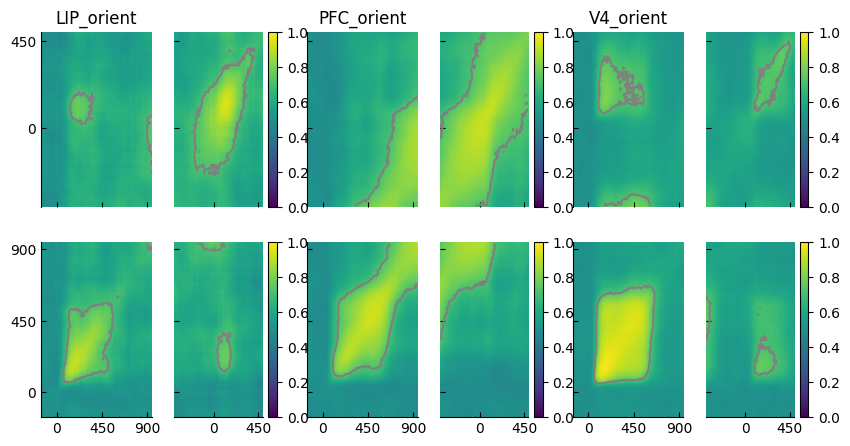

In [13]:
thresh=950
fig, ax =   plt.subplots(2,6,figsize=(10,5), sharex="col", sharey="row")
time_s=np.arange(start=-150, stop=450*3-50, step=10)
time_t=np.arange(start=-400, stop=450*2-50, step=10)

samp_limit  =   np.where(time_s==950)[0][0]
test_limit  =   np.where(time_t==500)[0][0]


im00=ax[0,0].imshow(np.mean(perf_lip_tr_t_t_s_orient[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im10=ax[1,0].imshow(np.mean(perf_lip_tr_s_t_s_orient[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im01=ax[0,1].imshow(np.mean(perf_lip_tr_t_t_t_orient[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im11=ax[1,1].imshow(np.mean(perf_lip_tr_s_t_t_orient[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')

im02=ax[0,2].imshow(np.mean(perf_pfc_tr_t_t_s_orient[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im12=ax[1,2].imshow(np.mean(perf_pfc_tr_s_t_s_orient[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im03=ax[0,3].imshow(np.mean(perf_pfc_tr_t_t_t_orient[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im13=ax[1,3].imshow(np.mean(perf_pfc_tr_s_t_t_orient[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')

ax[0, 0].set_title('LIP_orient')
ax[0, 2].set_title('PFC_orient')
ax[0, 4].set_title('V4_orient')

im04=ax[0,4].imshow(np.mean(perf_v4_tr_t_t_s_orient[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im14=ax[1,4].imshow(np.mean(perf_v4_tr_s_t_s_orient[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im05=ax[0,5].imshow(np.mean(perf_v4_tr_t_t_t_orient[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im15=ax[1,5].imshow(np.mean(perf_v4_tr_s_t_t_orient[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')

ax[0,0].contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_lip_tr_t_t_s_orient[:test_limit,:samp_limit], [thresh], colors='grey')
ax[0,1].contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_lip_tr_t_t_t_orient[:test_limit,:test_limit], [thresh], colors='grey')
ax[1,0].contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_lip_tr_s_t_s_orient[:samp_limit,:samp_limit], [thresh], colors='grey')
ax[1,1].contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_lip_tr_s_t_t_orient[:samp_limit,:test_limit], [thresh], colors='grey')

ax[0,2].contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_pfc_tr_t_t_s_orient[:test_limit,:samp_limit], [thresh], colors='grey')
ax[0,3].contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_pfc_tr_t_t_t_orient[:test_limit,:test_limit], [thresh], colors='grey')
ax[1,2].contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_pfc_tr_s_t_s_orient[:samp_limit,:samp_limit], [thresh], colors='grey')
ax[1,3].contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_pfc_tr_s_t_t_orient[:samp_limit,:test_limit], [thresh], colors='grey')

ax[0,4].contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_v4_tr_t_t_s_orient[:test_limit,:samp_limit], [thresh], colors='grey')
ax[0,5].contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_v4_tr_t_t_t_orient[:test_limit,:test_limit], [thresh], colors='grey')
ax[1,4].contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_v4_tr_s_t_s_orient[:samp_limit,:samp_limit], [thresh], colors='grey')
ax[1,5].contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_v4_tr_s_t_t_orient[:samp_limit,:test_limit], [thresh], colors='grey')

ax[0,0].set_xticks(xt_s)
ax[0,0].set_yticks(xt_t)
ax[1,0].set_xticks(xt_s)
ax[1,0].set_yticks(xt_s)
ax[0,1].set_xticks(xt_t)
ax[0,1].set_yticks(xt_t)
ax[1,1].set_xticks(xt_t)
ax[1,1].set_yticks(xt_s)

ax[0,0].set_xticklabels(time_s[xt_s].astype(str))
ax[0,0].set_yticklabels(time_t[xt_t].astype(str))
ax[1,0].set_xticklabels(time_s[xt_s].astype(str))
ax[1,0].set_yticklabels(time_s[xt_s].astype(str))
ax[0,1].set_xticklabels(time_t[xt_t].astype(str))
ax[0,1].set_yticklabels(time_t[xt_t].astype(str))
ax[1,1].set_xticklabels(time_t[xt_t].astype(str))
ax[1,1].set_yticklabels(time_s[xt_s].astype(str))

ax[0,2].set_xticks(xt_s)
ax[0,2].set_yticks(xt_t)
ax[1,2].set_xticks(xt_s)
ax[1,2].set_yticks(xt_s)
ax[0,3].set_xticks(xt_t)
ax[0,3].set_yticks(xt_t)
ax[1,3].set_xticks(xt_t)
ax[1,3].set_yticks(xt_s)

ax[0,2].set_xticklabels(time_s[xt_s].astype(str))
ax[0,2].set_yticklabels(time_t[xt_t].astype(str))
ax[1,2].set_xticklabels(time_s[xt_s].astype(str))
ax[1,2].set_yticklabels(time_s[xt_s].astype(str))
ax[0,3].set_xticklabels(time_t[xt_t].astype(str))
ax[0,3].set_yticklabels(time_t[xt_t].astype(str))
ax[1,3].set_xticklabels(time_t[xt_t].astype(str))
ax[1,3].set_yticklabels(time_s[xt_s].astype(str))

ax[0,4].set_xticks(xt_s)
ax[0,4].set_yticks(xt_t)
ax[1,4].set_xticks(xt_s)
ax[1,4].set_yticks(xt_s)
ax[0,5].set_xticks(xt_t)
ax[0,5].set_yticks(xt_t)
ax[1,5].set_xticks(xt_t)
ax[1,5].set_yticks(xt_s)

ax[0,4].set_xticklabels(time_s[xt_s].astype(str))
ax[0,4].set_yticklabels(time_t[xt_t].astype(str))
ax[1,4].set_xticklabels(time_s[xt_s].astype(str))
ax[1,4].set_yticklabels(time_s[xt_s].astype(str))
ax[0,5].set_xticklabels(time_t[xt_t].astype(str))
ax[0,5].set_yticklabels(time_t[xt_t].astype(str))
ax[1,5].set_xticklabels(time_t[xt_t].astype(str))
ax[1,5].set_yticklabels(time_s[xt_s].astype(str))


ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['bottom'].set_visible(False)

ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['bottom'].set_visible(False)
ax[0,1].spines['left'].set_visible(False)

ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)

ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['left'].set_visible(False)

ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['bottom'].set_visible(False)

ax[0,3].spines['top'].set_visible(False)
ax[0,3].spines['right'].set_visible(False)
ax[0,3].spines['bottom'].set_visible(False)
ax[0,3].spines['left'].set_visible(False)

ax[1,2].spines['top'].set_visible(False)
ax[1,2].spines['right'].set_visible(False)

ax[1,3].spines['top'].set_visible(False)
ax[1,3].spines['right'].set_visible(False)
ax[1,3].spines['left'].set_visible(False)


ax[0,4].spines['top'].set_visible(False)
ax[0,4].spines['right'].set_visible(False)
ax[0,4].spines['bottom'].set_visible(False)

ax[0,5].spines['top'].set_visible(False)
ax[0,5].spines['right'].set_visible(False)
ax[0,5].spines['bottom'].set_visible(False)
ax[0,5].spines['left'].set_visible(False)

ax[1,4].spines['top'].set_visible(False)
ax[1,4].spines['right'].set_visible(False)

ax[1,5].spines['top'].set_visible(False)
ax[1,5].spines['right'].set_visible(False)
ax[1,5].spines['left'].set_visible(False)

ax[0,0].tick_params(direction="in")
ax[0,1].tick_params(direction="in")
ax[1,0].tick_params(direction="in")
ax[1,1].tick_params(direction="in")

ax[0,2].tick_params(direction="in")
ax[0,3].tick_params(direction="in")
ax[1,2].tick_params(direction="in")
ax[1,3].tick_params(direction="in")

ax[0,4].tick_params(direction="in")
ax[0,5].tick_params(direction="in")
ax[1,4].tick_params(direction="in")
ax[1,5].tick_params(direction="in")

fig.colorbar(im01)
fig.colorbar(im11)
fig.colorbar(im03)
fig.colorbar(im13)
fig.colorbar(im05)
fig.colorbar(im15)
for ax in fig.get_axes():
    ax.label_outer()

plt.savefig('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/figures/decoding_orienta.pdf') 

C:\Users\ibos.g\AppData\Local\Temp\ipykernel_19736\895425014.py:29: UserWarning: No contour levels were found within the data range.
  ax[0,0].contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_lip_tr_t_t_s_color[:test_limit,:samp_limit], [thresh], colors='grey')
C:\Users\ibos.g\AppData\Local\Temp\ipykernel_19736\895425014.py:30: UserWarning: No contour levels were found within the data range.
  ax[0,1].contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_lip_tr_t_t_t_color[:test_limit,:test_limit], [thresh], colors='grey')
C:\Users\ibos.g\AppData\Local\Temp\ipykernel_19736\895425014.py:32: UserWarning: No contour levels were found within the data range.
  ax[1,1].contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_lip_tr_s_t_t_color[:samp_limit,:test_limit], [thresh], colors='grey')
C:\Users\ibos.g\AppData\Local\Temp\ipykernel_19736\895425014.py:34:

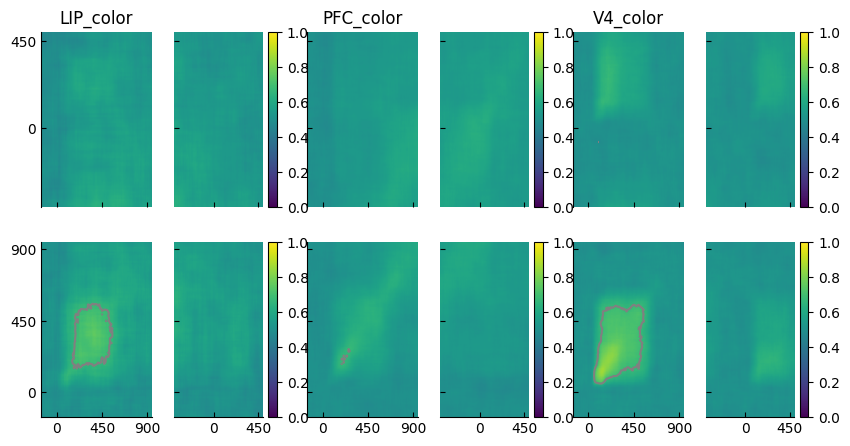

In [14]:
thresh=950
fig, ax =   plt.subplots(2,6,figsize=(10,5), sharex="col", sharey="row")
time_s=np.arange(start=-150, stop=450*3-50, step=10)
time_t=np.arange(start=-400, stop=450*2-50, step=10)

samp_limit  =   np.where(time_s==950)[0][0]
test_limit  =   np.where(time_t==500)[0][0]


im00=ax[0,0].imshow(np.mean(perf_lip_tr_t_t_s_color[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im10=ax[1,0].imshow(np.mean(perf_lip_tr_s_t_s_color[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im01=ax[0,1].imshow(np.mean(perf_lip_tr_t_t_t_color[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im11=ax[1,1].imshow(np.mean(perf_lip_tr_s_t_t_color[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')

im02=ax[0,2].imshow(np.mean(perf_pfc_tr_t_t_s_color[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im12=ax[1,2].imshow(np.mean(perf_pfc_tr_s_t_s_color[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im03=ax[0,3].imshow(np.mean(perf_pfc_tr_t_t_t_color[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im13=ax[1,3].imshow(np.mean(perf_pfc_tr_s_t_t_color[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')

ax[0, 0].set_title('LIP_color')
ax[0, 2].set_title('PFC_color')
ax[0, 4].set_title('V4_color')

im04=ax[0,4].imshow(np.mean(perf_v4_tr_t_t_s_color[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im14=ax[1,4].imshow(np.mean(perf_v4_tr_s_t_s_color[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im05=ax[0,5].imshow(np.mean(perf_v4_tr_t_t_t_color[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im15=ax[1,5].imshow(np.mean(perf_v4_tr_s_t_t_color[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')

ax[0,0].contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_lip_tr_t_t_s_color[:test_limit,:samp_limit], [thresh], colors='grey')
ax[0,1].contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_lip_tr_t_t_t_color[:test_limit,:test_limit], [thresh], colors='grey')
ax[1,0].contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_lip_tr_s_t_s_color[:samp_limit,:samp_limit], [thresh], colors='grey')
ax[1,1].contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_lip_tr_s_t_t_color[:samp_limit,:test_limit], [thresh], colors='grey')

ax[0,2].contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_pfc_tr_t_t_s_color[:test_limit,:samp_limit], [thresh], colors='grey')
ax[0,3].contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_pfc_tr_t_t_t_color[:test_limit,:test_limit], [thresh], colors='grey')
ax[1,2].contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_pfc_tr_s_t_s_color[:samp_limit,:samp_limit], [thresh], colors='grey')
ax[1,3].contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_pfc_tr_s_t_t_color[:samp_limit,:test_limit], [thresh], colors='grey')

ax[0,4].contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_v4_tr_t_t_s_color[:test_limit,:samp_limit], [thresh], colors='grey')
ax[0,5].contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_v4_tr_t_t_t_color[:test_limit,:test_limit], [thresh], colors='grey')
ax[1,4].contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_v4_tr_s_t_s_color[:samp_limit,:samp_limit], [thresh], colors='grey')
ax[1,5].contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_v4_tr_s_t_t_color[:samp_limit,:test_limit], [thresh], colors='grey')

ax[0,0].set_xticks(xt_s)
ax[0,0].set_yticks(xt_t)
ax[1,0].set_xticks(xt_s)
ax[1,0].set_yticks(xt_s)
ax[0,1].set_xticks(xt_t)
ax[0,1].set_yticks(xt_t)
ax[1,1].set_xticks(xt_t)
ax[1,1].set_yticks(xt_s)

ax[0,0].set_xticklabels(time_s[xt_s].astype(str))
ax[0,0].set_yticklabels(time_t[xt_t].astype(str))
ax[1,0].set_xticklabels(time_s[xt_s].astype(str))
ax[1,0].set_yticklabels(time_s[xt_s].astype(str))
ax[0,1].set_xticklabels(time_t[xt_t].astype(str))
ax[0,1].set_yticklabels(time_t[xt_t].astype(str))
ax[1,1].set_xticklabels(time_t[xt_t].astype(str))
ax[1,1].set_yticklabels(time_s[xt_s].astype(str))

ax[0,2].set_xticks(xt_s)
ax[0,2].set_yticks(xt_t)
ax[1,2].set_xticks(xt_s)
ax[1,2].set_yticks(xt_s)
ax[0,3].set_xticks(xt_t)
ax[0,3].set_yticks(xt_t)
ax[1,3].set_xticks(xt_t)
ax[1,3].set_yticks(xt_s)

ax[0,2].set_xticklabels(time_s[xt_s].astype(str))
ax[0,2].set_yticklabels(time_t[xt_t].astype(str))
ax[1,2].set_xticklabels(time_s[xt_s].astype(str))
ax[1,2].set_yticklabels(time_s[xt_s].astype(str))
ax[0,3].set_xticklabels(time_t[xt_t].astype(str))
ax[0,3].set_yticklabels(time_t[xt_t].astype(str))
ax[1,3].set_xticklabels(time_t[xt_t].astype(str))
ax[1,3].set_yticklabels(time_s[xt_s].astype(str))

ax[0,4].set_xticks(xt_s)
ax[0,4].set_yticks(xt_t)
ax[1,4].set_xticks(xt_s)
ax[1,4].set_yticks(xt_s)
ax[0,5].set_xticks(xt_t)
ax[0,5].set_yticks(xt_t)
ax[1,5].set_xticks(xt_t)
ax[1,5].set_yticks(xt_s)

ax[0,4].set_xticklabels(time_s[xt_s].astype(str))
ax[0,4].set_yticklabels(time_t[xt_t].astype(str))
ax[1,4].set_xticklabels(time_s[xt_s].astype(str))
ax[1,4].set_yticklabels(time_s[xt_s].astype(str))
ax[0,5].set_xticklabels(time_t[xt_t].astype(str))
ax[0,5].set_yticklabels(time_t[xt_t].astype(str))
ax[1,5].set_xticklabels(time_t[xt_t].astype(str))
ax[1,5].set_yticklabels(time_s[xt_s].astype(str))

ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['bottom'].set_visible(False)

ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['bottom'].set_visible(False)
ax[0,1].spines['left'].set_visible(False)

ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)

ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['left'].set_visible(False)

ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['bottom'].set_visible(False)

ax[0,3].spines['top'].set_visible(False)
ax[0,3].spines['right'].set_visible(False)
ax[0,3].spines['bottom'].set_visible(False)
ax[0,3].spines['left'].set_visible(False)

ax[1,2].spines['top'].set_visible(False)
ax[1,2].spines['right'].set_visible(False)

ax[1,3].spines['top'].set_visible(False)
ax[1,3].spines['right'].set_visible(False)
ax[1,3].spines['left'].set_visible(False)


ax[0,4].spines['top'].set_visible(False)
ax[0,4].spines['right'].set_visible(False)
ax[0,4].spines['bottom'].set_visible(False)

ax[0,5].spines['top'].set_visible(False)
ax[0,5].spines['right'].set_visible(False)
ax[0,5].spines['bottom'].set_visible(False)
ax[0,5].spines['left'].set_visible(False)

ax[1,4].spines['top'].set_visible(False)
ax[1,4].spines['right'].set_visible(False)

ax[1,5].spines['top'].set_visible(False)
ax[1,5].spines['right'].set_visible(False)
ax[1,5].spines['left'].set_visible(False)

ax[0,0].tick_params(direction="in")
ax[0,1].tick_params(direction="in")
ax[1,0].tick_params(direction="in")
ax[1,1].tick_params(direction="in")

ax[0,2].tick_params(direction="in")
ax[0,3].tick_params(direction="in")
ax[1,2].tick_params(direction="in")
ax[1,3].tick_params(direction="in")

ax[0,4].tick_params(direction="in")
ax[0,5].tick_params(direction="in")
ax[1,4].tick_params(direction="in")
ax[1,5].tick_params(direction="in")

fig.colorbar(im01)
fig.colorbar(im11)
fig.colorbar(im03)
fig.colorbar(im13)
fig.colorbar(im05)
fig.colorbar(im15)
for ax in fig.get_axes():
    ax.label_outer()
plt.savefig('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/figures/decoding_color.pdf') 

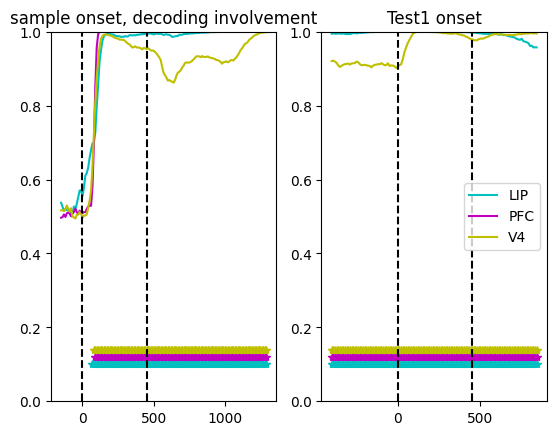

In [7]:
# print neutral

fig, ax     =   plt.subplots(1,2)
time_s=np.arange(start=-150, stop=450*3-50, step=10)
ax[0].plot(time_s, np.mean(perf_lips_neutral, axis=0)/20, 'c', label='LIP')
ax[0].plot(time_s, np.mean(perf_pfcs_neutral, axis=0)/20, 'm', label='PFC')
ax[0].plot(time_s, np.mean(perf_v4s_neutral, axis=0)/20, 'y', label='V4')
ax[0].plot(time_s[np.where(sig_lips_neutral>950)],np.ones(sig_lips_neutral[sig_lips_neutral>950].shape[0])/10, 'c*')
ax[0].plot(time_s[np.where(sig_pfcs_neutral>950)],np.ones(sig_pfcs_neutral[sig_pfcs_neutral>950].shape[0])/10+0.02, 'm*')
ax[0].plot(time_s[np.where(sig_v4s_neutral>950)],np.ones(sig_v4s_neutral[sig_v4s_neutral>950].shape[0])/10+0.04, 'y*')
ax[0].plot([0,0], [0, 1],'--k')
ax[0].plot([450,450], [0, 1],'--k')
ax[0].set_ylim(0,1)
ax[0].set_title('sample onset, decoding involvement')
plt.subplot(1,2,2)
time_t=np.arange(start=-400, stop=450*2-50, step=10)
ax[1].plot(time_t, np.mean(perf_lipt_neutral, axis=0)/20, 'c', label='LIP')
ax[1].plot(time_t, np.mean(perf_pfct_neutral, axis=0)/20, 'm', label='PFC')
ax[1].plot(time_t, np.mean(perf_v4t_neutral, axis=0)/20, 'y', label='V4')
ax[1].plot(time_t[np.where(sig_lipt_neutral>950)],np.ones(sig_lipt_neutral[sig_lipt_neutral>950].shape[0])/10, 'c*')
ax[1].plot(time_t[np.where(sig_pfct_neutral>950)],np.ones(sig_pfct_neutral[sig_pfct_neutral>950].shape[0])/10+0.02, 'm*')
ax[1].plot(time_t[np.where(sig_v4t_neutral>950)],np.ones(sig_v4t_neutral[sig_v4t_neutral>950].shape[0])/10+0.04, 'y*')
ax[1].plot([0,0], [0, 1],'--k')
ax[1].plot([450,450], [0, 1],'--k')
ax[1].set_ylim(0,1)
ax[1].set_title('Test1 onset')
ax[1].legend()

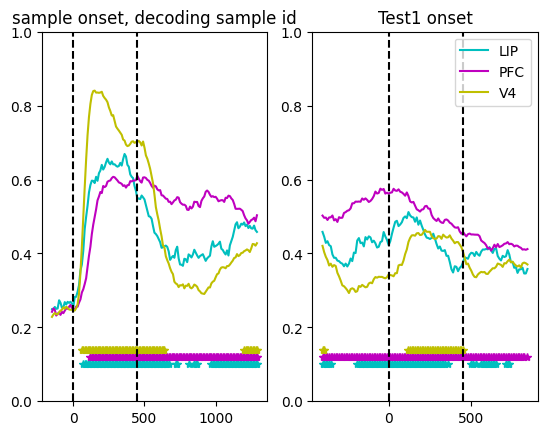

In [29]:
# print sample id p<0.05

fig, ax     =   plt.subplots(1,2)
time_s=np.arange(start=-150, stop=450*3-50, step=10)
ax[0].plot(time_s, np.mean(perf_lips_sample, axis=0)/40, 'c', label='LIP')
ax[0].plot(time_s, np.mean(perf_pfcs_sample, axis=0)/40, 'm', label='PFC')
ax[0].plot(time_s, np.mean(perf_v4s_sample, axis=0)/40, 'y', label='V4')
ax[0].plot(time_s[np.where(sig_lips_sample>950)],np.ones(sig_lips_sample[sig_lips_sample>950].shape[0])/10, 'c*')
ax[0].plot(time_s[np.where(sig_pfcs_sample>950)],np.ones(sig_pfcs_sample[sig_pfcs_sample>950].shape[0])/10+0.02, 'm*')
ax[0].plot(time_s[np.where(sig_v4s_sample>950)],np.ones(sig_v4s_sample[sig_v4s_sample>950].shape[0])/10+0.04, 'y*')
ax[0].plot([0,0], [0, 1],'--k')
ax[0].plot([450,450], [0, 1],'--k')
ax[0].set_ylim(0,1)
ax[0].set_title('sample onset, decoding sample id')
plt.subplot(1,2,2)
time_t=np.arange(start=-400, stop=450*2-50, step=10)
ax[1].plot(time_t, np.mean(perf_lipt_sample, axis=0)/40, 'c', label='LIP')
ax[1].plot(time_t, np.mean(perf_pfct_sample, axis=0)/40, 'm', label='PFC')
ax[1].plot(time_t, np.mean(perf_v4t_sample, axis=0)/40, 'y', label='V4')
ax[1].plot(time_t[np.where(sig_lipt_sample>950)],np.ones(sig_lipt_sample[sig_lipt_sample>950].shape[0])/10, 'c*')
ax[1].plot(time_t[np.where(sig_pfct_sample>950)],np.ones(sig_pfct_sample[sig_pfct_sample>950].shape[0])/10+0.02, 'm*')
ax[1].plot(time_t[np.where(sig_v4t_sample>950)],np.ones(sig_v4t_sample[sig_v4t_sample>950].shape[0])/10+0.04, 'y*')
ax[1].plot([0,0], [0, 1],'--k')
ax[1].plot([450,450], [0, 1],'--k')
ax[1].set_ylim(0,1)
ax[1].set_title('Test1 onset')
ax[1].legend()

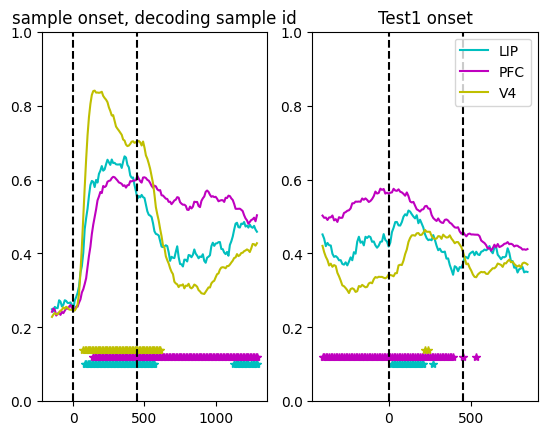

In [8]:
# print sample id p<0.01

fig, ax     =   plt.subplots(1,2)
time_s=np.arange(start=-150, stop=450*3-50, step=10)
ax[0].plot(time_s, np.mean(perf_lips_sample, axis=0)/40, 'c', label='LIP')
ax[0].plot(time_s, np.mean(perf_pfcs_sample, axis=0)/40, 'm', label='PFC')
ax[0].plot(time_s, np.mean(perf_v4s_sample, axis=0)/40, 'y', label='V4')
ax[0].plot(time_s[np.where(sig_lips_sample>990)],np.ones(sig_lips_sample[sig_lips_sample>990].shape[0])/10, 'c*')
ax[0].plot(time_s[np.where(sig_pfcs_sample>990)],np.ones(sig_pfcs_sample[sig_pfcs_sample>990].shape[0])/10+0.02, 'm*')
ax[0].plot(time_s[np.where(sig_v4s_sample>990)],np.ones(sig_v4s_sample[sig_v4s_sample>990].shape[0])/10+0.04, 'y*')
ax[0].plot([0,0], [0, 1],'--k')
ax[0].plot([450,450], [0, 1],'--k')
ax[0].set_ylim(0,1)
ax[0].set_title('sample onset, decoding sample id')
plt.subplot(1,2,2)
time_t=np.arange(start=-400, stop=450*2-50, step=10)
ax[1].plot(time_t, np.mean(perf_lipt_sample, axis=0)/40, 'c', label='LIP')
ax[1].plot(time_t, np.mean(perf_pfct_sample, axis=0)/40, 'm', label='PFC')
ax[1].plot(time_t, np.mean(perf_v4t_sample, axis=0)/40, 'y', label='V4')
ax[1].plot(time_t[np.where(sig_lipt_sample>990)],np.ones(sig_lipt_sample[sig_lipt_sample>990].shape[0])/10, 'c*')
ax[1].plot(time_t[np.where(sig_pfct_sample>990)],np.ones(sig_pfct_sample[sig_pfct_sample>990].shape[0])/10+0.02, 'm*')
ax[1].plot(time_t[np.where(sig_v4t_sample>990)],np.ones(sig_v4t_sample[sig_v4t_sample>990].shape[0])/10+0.04, 'y*')
ax[1].plot([0,0], [0, 1],'--k')
ax[1].plot([450,450], [0, 1],'--k')
ax[1].set_ylim(0,1)
ax[1].set_title('Test1 onset')
ax[1].legend()

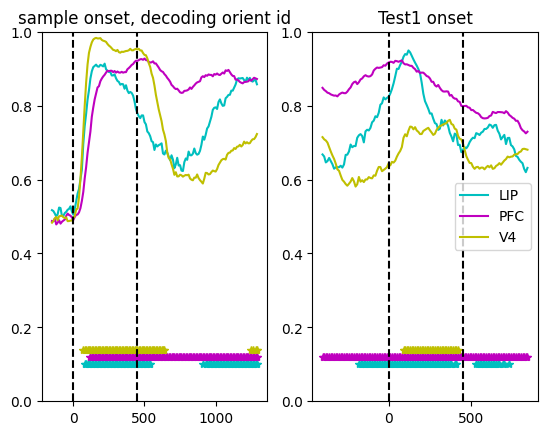

In [9]:
# print sample orientation p<0.05

fig, ax     =   plt.subplots(1,2)
time_s=np.arange(start=-150, stop=450*3-50, step=10)
ax[0].plot(time_s, np.mean(perf_lips_orient, axis=0)/20, 'c', label='LIP')
ax[0].plot(time_s, np.mean(perf_pfcs_orient, axis=0)/20, 'm', label='PFC')
ax[0].plot(time_s, np.mean(perf_v4s_orient, axis=0)/20, 'y', label='V4')
ax[0].plot(time_s[np.where(sig_lips_orient>950)],np.ones(sig_lips_orient[sig_lips_orient>950].shape[0])/10, 'c*')
ax[0].plot(time_s[np.where(sig_pfcs_orient>950)],np.ones(sig_pfcs_orient[sig_pfcs_orient>950].shape[0])/10+0.02, 'm*')
ax[0].plot(time_s[np.where(sig_v4s_orient>950)],np.ones(sig_v4s_orient[sig_v4s_orient>950].shape[0])/10+0.04, 'y*')
ax[0].plot([0,0], [0, 1],'--k')
ax[0].plot([450,450], [0, 1],'--k')
ax[0].set_ylim(0,1)
ax[0].set_title('sample onset, decoding orient id')
plt.subplot(1,2,2)
time_t=np.arange(start=-400, stop=450*2-50, step=10)
ax[1].plot(time_t, np.mean(perf_lipt_orient, axis=0)/20, 'c', label='LIP')
ax[1].plot(time_t, np.mean(perf_pfct_orient, axis=0)/20, 'm', label='PFC')
ax[1].plot(time_t, np.mean(perf_v4t_orient, axis=0)/20, 'y', label='V4')
ax[1].plot(time_t[np.where(sig_lipt_orient>950)],np.ones(sig_lipt_orient[sig_lipt_orient>950].shape[0])/10, 'c*')
ax[1].plot(time_t[np.where(sig_pfct_orient>950)],np.ones(sig_pfct_orient[sig_pfct_orient>950].shape[0])/10+0.02, 'm*')
ax[1].plot(time_t[np.where(sig_v4t_orient>950)],np.ones(sig_v4t_orient[sig_v4t_orient>950].shape[0])/10+0.04, 'y*')
ax[1].plot([0,0], [0, 1],'--k')
ax[1].plot([450,450], [0, 1],'--k')
ax[1].set_ylim(0,1)
ax[1].set_title('Test1 onset')
ax[1].legend()

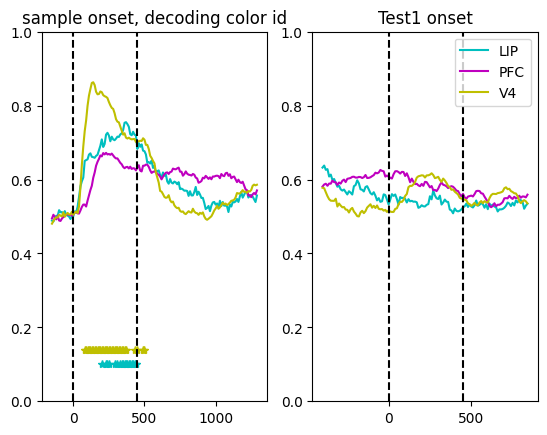

In [10]:
# print sample color p<0.05

fig, ax     =   plt.subplots(1,2)
time_s=np.arange(start=-150, stop=450*3-50, step=10)
ax[0].plot(time_s, np.mean(perf_lips_color, axis=0)/20, 'c', label='LIP')
ax[0].plot(time_s, np.mean(perf_pfcs_color, axis=0)/20, 'm', label='PFC')
ax[0].plot(time_s, np.mean(perf_v4s_color, axis=0)/20, 'y', label='V4')
ax[0].plot(time_s[np.where(sig_lips_color>950)],np.ones(sig_lips_color[sig_lips_color>950].shape[0])/10, 'c*')
ax[0].plot(time_s[np.where(sig_pfcs_color>950)],np.ones(sig_pfcs_color[sig_pfcs_color>950].shape[0])/10+0.02, 'm*')
ax[0].plot(time_s[np.where(sig_v4s_color>950)],np.ones(sig_v4s_color[sig_v4s_color>950].shape[0])/10+0.04, 'y*')
ax[0].plot([0,0], [0, 1],'--k')
ax[0].plot([450,450], [0, 1],'--k')
ax[0].set_ylim(0,1)
ax[0].set_title('sample onset, decoding color id')
plt.subplot(1,2,2)
time_t=np.arange(start=-400, stop=450*2-50, step=10)
ax[1].plot(time_t, np.mean(perf_lipt_color, axis=0)/20, 'c', label='LIP')
ax[1].plot(time_t, np.mean(perf_pfct_color, axis=0)/20, 'm', label='PFC')
ax[1].plot(time_t, np.mean(perf_v4t_color, axis=0)/20, 'y', label='V4')
ax[1].plot(time_t[np.where(sig_lipt_color>950)],np.ones(sig_lipt_color[sig_lipt_color>950].shape[0])/10, 'c*')
ax[1].plot(time_t[np.where(sig_pfct_color>950)],np.ones(sig_pfct_color[sig_pfct_color>950].shape[0])/10+0.02, 'm*')
ax[1].plot(time_t[np.where(sig_v4t_color>950)],np.ones(sig_v4t_color[sig_v4t_color>950].shape[0])/10+0.04, 'y*')
ax[1].plot([0,0], [0, 1],'--k')
ax[1].plot([450,450], [0, 1],'--k')
ax[1].set_ylim(0,1)
ax[1].set_title('Test1 onset')
ax[1].legend()